# Convolutional Neural Network info

- The goal of the next convolutional neural networks will be to classify and detect images or specific objects from within the image.


CONCEPTS:
- Image data
- Convolutional Layer
- Pooling Layer
- CNN Architectures

### Image Data

Image data that is usually made up of 3 dimensions. These dimensions are as follows:
1. Image height
2. Image Wisth
3. Color channels : the number of color channels represents the depth of an image and coorelates to the colors used in it.

### Convolutional Layer

The main difference between a dense layer and a convolutional layer in that dense layers detect patterns globally while convolutional layers detects patterns locally. 
- Dense layers are capable of analize the data in a global capacity
- Convolutional layers can detect local patterns using part of the data.

The patterns are detected by different filters. --> response map

# Convnet

The problem is classifying 10 different veryday objects. The dataset is called CIFAR Image Dataset. It contains 60,000 32*32 color images of each class. The lables in this dataset are the following:
1. Airplane
2. Automobile
3. Bird
4. Cat
5. Deer
6. Dog
7. Frog
8. Horse
9. Ship
10. Truck

In [6]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [7]:
#load and split datset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

#normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

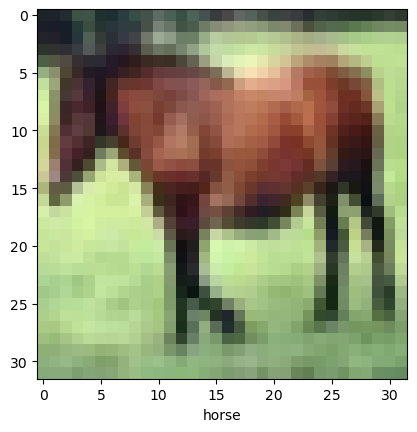

In [8]:
#let's look at a one image
IMG_INDEX = 7
plt.imshow(train_images[IMG_INDEX], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

### CNN Architecture

- A stack of Conv2D and MaxPooling2D layers folowed by a few denesly connected layers.


In [9]:
#arquitectura comun en modelos de reconocimiento de imagenes, adecuada para reconocer patrones complejos en imagenes pequenas

model = models.Sequential() #contenedor lineal en el q se pueden apilar capas (las capas se a;aden en el orden en el que se definen)
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3))) #32 filtros de 3*3, imagen de 32*32pixeles con 3 canales de color RGB
model.add(layers.MaxPooling2D((2,2))) #capa que reduce la dimension de los mapas de caract. --> filtro de 2*2 para reducir la resolucion
model.add(layers.Conv2D(64, (3,3) , activation='relu')) #64 filtros de 3*3 pixeles
model.add(layers.MaxPooling2D((2,2))) #reduce aun mas la dimensionalidad de los mapas de caracteristicas
model.add(layers.Conv2D(64, (3,3) , activation='relu')) #64 filtros e 3*3 pixeles

#relu (si la  entrada es negativa o 0, la salida es 0 --> si la entrada es pos , la salida es pos)

#las capas convolucionales detectan caracteristicas cada vez mas complejas en la imagen
# las capas de pooling reducen la dimensionalidad de los datos, haciendolos mas manejables para las capas posteriores

c:\Users\VICTUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

We can notice that the depth of our image increases but the spacial dimensions reduce drastically

### Adding Dense Layers

In [11]:
model.add(layers.Flatten()) #aplana las salidas de las capas convolucionales y de pooling previas
model.add(layers.Dense(64, activation='relu')) #fully connected
model.add(layers.Dense(10)) #capa de salida del modelo

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

Final output layer of 10 neurons

# Training

In [13]:
model.compile(optimizer='adam', #optimizador
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), #cuan bien se desempe;a el modelo
              metrics=['accuracy'])

history = model.fit (train_images, train_labels, epochs=4, validation_data=(test_images, test_labels))

Epoch 1/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.3460 - loss: 1.7670 - val_accuracy: 0.5372 - val_loss: 1.2816
Epoch 2/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5672 - loss: 1.2088 - val_accuracy: 0.6110 - val_loss: 1.0894
Epoch 3/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6392 - loss: 1.0314 - val_accuracy: 0.6400 - val_loss: 1.0127
Epoch 4/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6749 - loss: 0.9240 - val_accuracy: 0.6632 - val_loss: 0.9691


# Evaluating the model

We can determine how well the model performed by looking at it's performance on the data set

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print (test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.6632 - loss: 0.9691
0.6632000207901001


We should be getting an accuracy of about 70%

SOME BETTER APPROACHES FOR COMPUTER VISION BELOW:

# Working with small datasets

In the situation where you don't have millions of images, it is difficult to train a CNN from scracth that performes very well. This is why we learn a few techniques we can use to train CNN's on small datasets of just a few thousand images.

### Data Augmentation

To avoid overfitting and create a larger dataset from a smaller one, we can use a technique called data augmentation. This is simply performing random transformations on our images so that our model can generalize better. This transformations can be things like compressions, rotations, stretches and even color changes.

In [15]:
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [16]:
#creating a data generator object that transforms images
datagen = ImageDataGenerator(
    rotation_range = 40, #gira las imagenes
    width_shift_range = 0.2, #desplaza las imagenes horizontalmente
    height_shift_range = 0.2, #desplaza las imagenes verticalmente
    shear_range = 0.2, #aplica transformacion de corte a las imagenes
    zoom_range = 0.2, #zoom aleatorio dentro de un rango del 20%
    horizontal_flip = True, #invierte las imagenes horizontalmente al azar
    fill_mode = 'nearest' #especifica como rellenar los pixeles vacios q se crean despues de aplciar transformaciones como desp o rotacion
)

In [19]:
#pick an image to transfor,
test_img = train_images[20]
img = image.img_to_array(test_img) #convert image to numpy array
img = img.reshape ((1,) + img.shape)  #reshape image

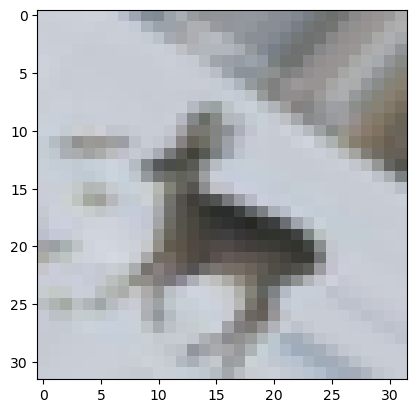

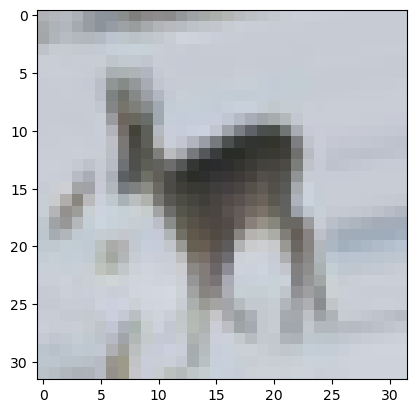

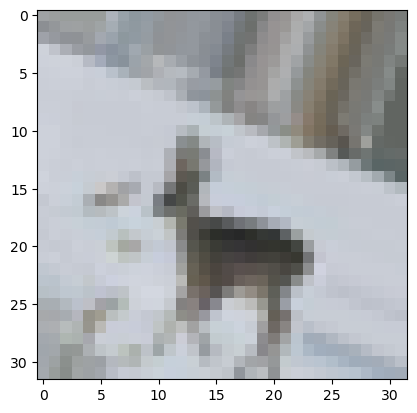

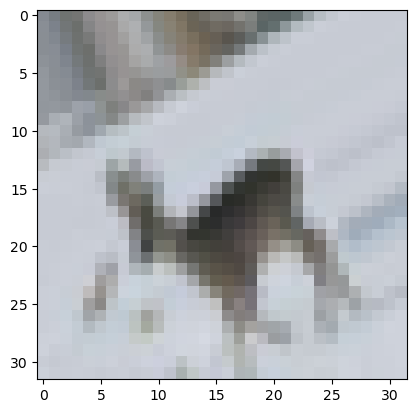

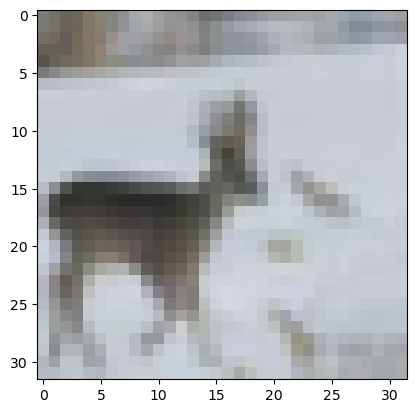

In [20]:
i = 0

for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'):
    plt.figure(i)
    plot = plt.imshow(image.img_to_array(batch[0]))
    i += 1 
    if i > 4: #show 4 images
        break

plt.show()

# Pretrained models and fine tuning

- PRETRAINED MODEL: We can use a pretrained CNN, at the star of our model. This allow us to have a very good convolutional base before adding our own dense layeres classifier at the end. By using this technique we can train a very good classifier for a realtively small dataset ( < 10000 images )
- FINE TUNING: We want to tweak the final layers in our convolutional base to work better for our specific problem. This involves not touching or retraining the earlier layers in the convolutional base but only adjusting the final few.

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
keras = tf.keras

# Dataset